<a href="https://colab.research.google.com/github/Larasati11/PCVK/blob/main/modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


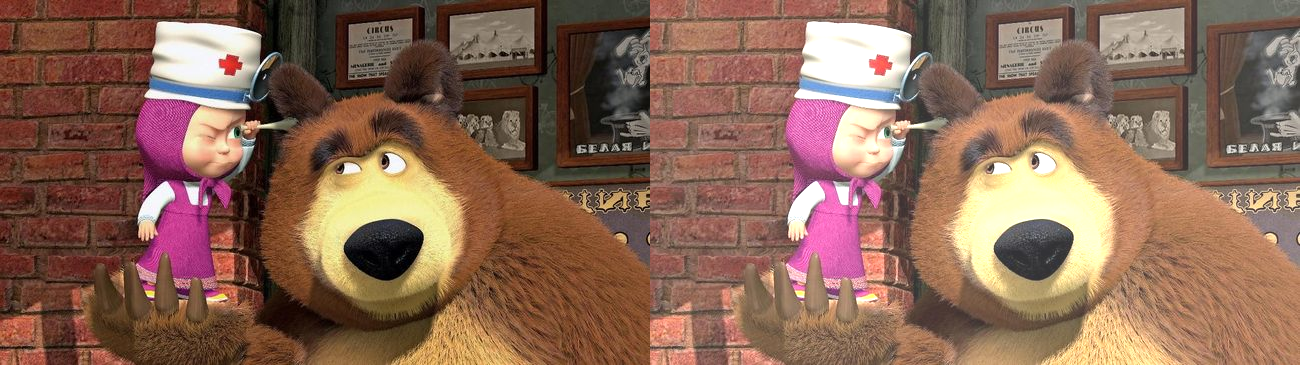

In [2]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/marsha.jpeg') # Change url with your image from gdrive
brightness_image = np.zeros(original.shape, original.dtype)

# Every pixel access
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Simple way without for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Tugas 1

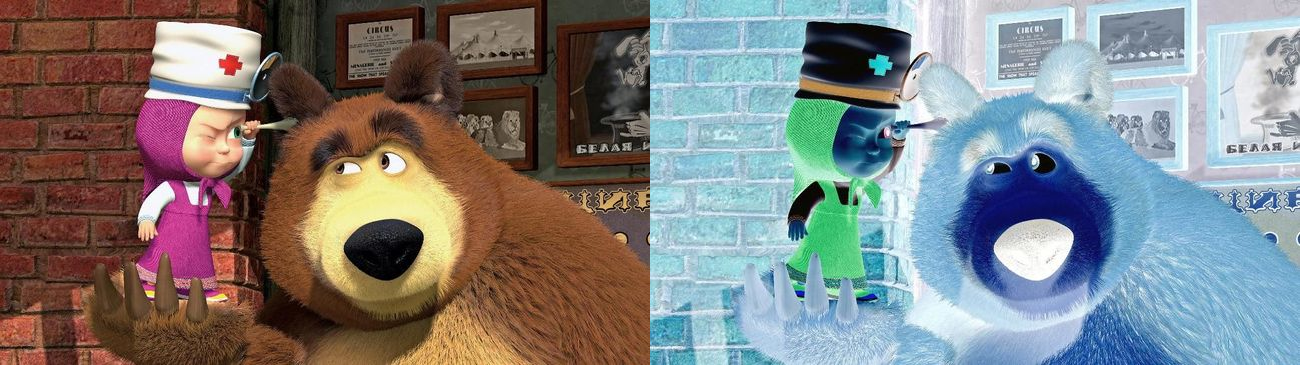

In [4]:
original = cv.imread('/content/drive/MyDrive/marsha.jpeg') # Change url with your image from gdrive
inverted_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, inverted_image))
cv2_imshow(final_frame)

Tugas 2

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


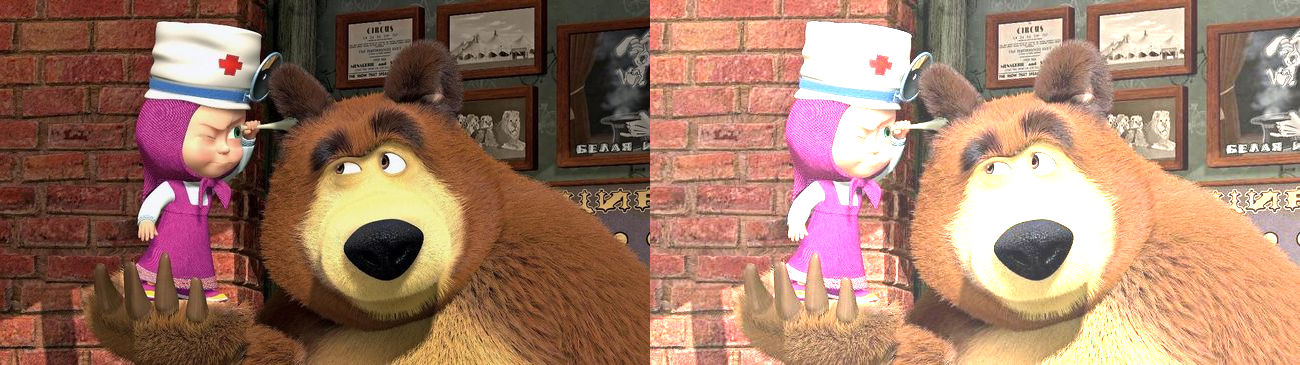

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, input tidak valid')
    brightness = 0  # Nilai default jika input tidak valid
    contrast = 1.0  # Nilai default jika input tidak valid

original = cv.imread('/content/drive/MyDrive/marsha.jpeg')  # Pastikan path gambar benar
if original is None:
    print('Error: Image not found')
    exit()

# Adjust brightness and contrast
brightness_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Concatenate original and brightness-adjusted images
final_frame = cv.hconcat([original, brightness_image])

# Display the images
cv2_imshow(final_frame)

Tugas 3

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 40


<ipython-input-6-caf11e7fe9a8>:16: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * (np.log(1 + original + brightness))
<ipython-input-6-caf11e7fe9a8>:19: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype=np.uint8)


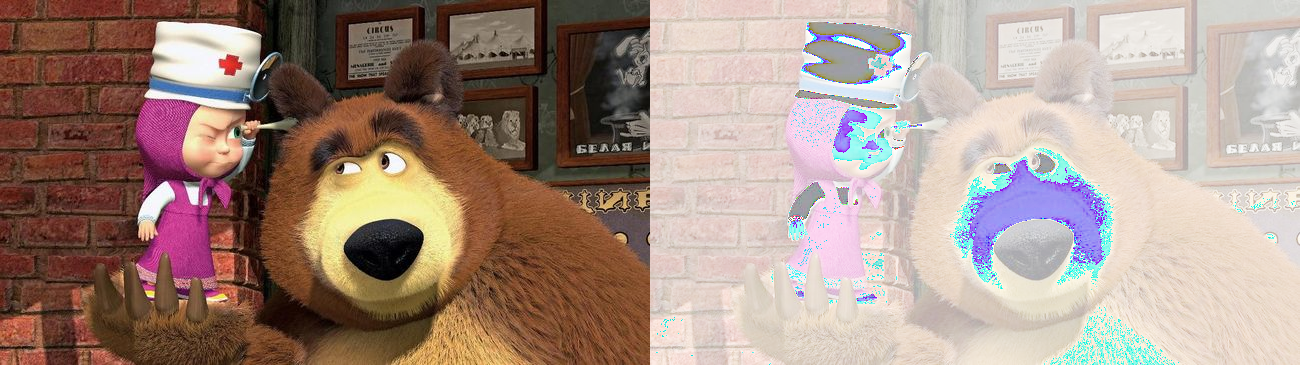

In [6]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, input tidak valid')
    brightness = 0  # Nilai default jika input tidak valid

original = cv.imread('/content/drive/MyDrive/marsha.jpeg')  # Pastikan path gambar benar
if original is None:
    print('Error: Image not found')
    exit()

# Terapkan Transformasi Log
c = 255 / np.log(1 + np.max(original))
log_transformed = c * (np.log(1 + original + brightness))

# Ubah tipe data menjadi uint8
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Gabungkan gambar asli dan gambar dengan transformasi log
final_frame = cv.hconcat([original, log_transformed])

# Tampilkan gambar
cv2_imshow(final_frame)

Tugas 4 a

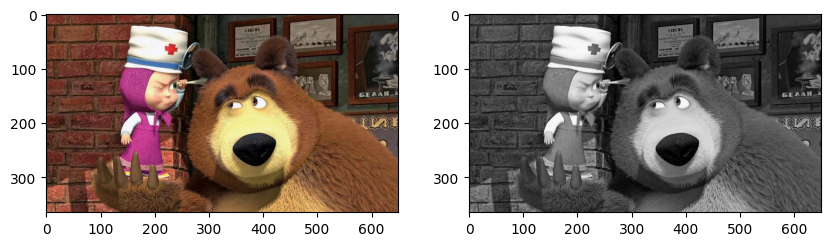

In [7]:
original = cv.imread('/content/drive/MyDrive/marsha.jpeg')  # Pastikan path gambar benar
if original is None:
    print('Error: Image not found')
    exit()

# Transformasi grayscale dengan metode averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Terapkan transformasi
gray_averaging = grayscale_averaging(original)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gray_averaging, cv.COLOR_GRAY2BGR))
plt.axis('on')

plt.show()

Tugas 4 b

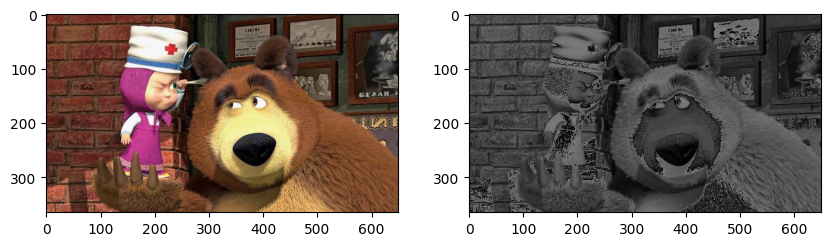

In [8]:
# Transformasi grayscale dengan metode lightness
def grayscale_lightness(image):
    max_channel = np.max(image, axis=2)
    min_channel = np.min(image, axis=2)
    return ((max_channel + min_channel) / 2).astype(np.uint8)

gray_lightness = grayscale_lightness(original)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR))
plt.axis('on')

plt.show()

Tugas 4 c

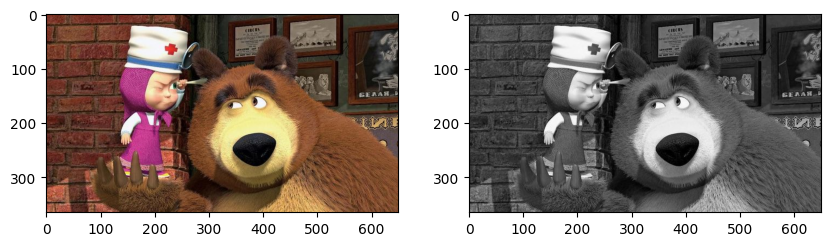

In [9]:
# Transformasi grayscale dengan metode luminance
def grayscale_luminance(image):
    return (0.21 * image[:,:,2] + 0.72 * image[:,:,1] + 0.07 * image[:,:,0]).astype(np.uint8)

gray_luminance = grayscale_luminance(original)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR))
plt.axis('on')

plt.show()

Tugas 5

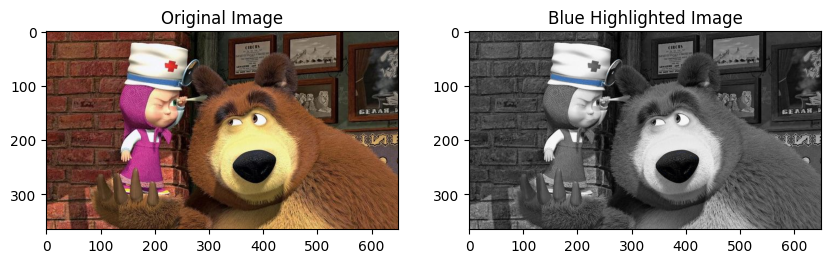

In [10]:
# Baca gambar asli
original = cv.imread('/content/drive/MyDrive/marsha.jpeg')  # Pastikan path gambar benar
if original is None:
    print('Error: Image not found')
    exit()

# Konversi gambar ke ruang warna HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Definisikan rentang warna biru dalam ruang warna HSV
lower_blue = np.array([100, 50, 0])
upper_blue = np.array([120, 255, 255])

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Buat gambar grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Buat gambar berwarna biru dengan bagian lain grayscale
blue_highlighted = cv.bitwise_and(original, original, mask=mask)
gray_background = cv.bitwise_and(gray, gray, mask=cv.bitwise_not(mask))
gray_background = cv.cvtColor(gray_background, cv.COLOR_GRAY2BGR)
final_image = cv.add(blue_highlighted, gray_background)

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Blue Highlighted Image')
plt.axis('on')

plt.show()